In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

## Change the color code platte 

In [2]:
colors_platte = np.array([
    [0, 0, 0],        # Unlabeled
    [70, 70, 70],     # Building
    [100, 40, 40],    # Fence
    [55, 90, 80],     # Other
    [220, 20, 60],    # Pedestrian
    [153, 153, 153],  # Pole
    [157, 234, 50],   # RoadLine
    [128, 64, 128],   # Road
    [244, 35, 232],   # SideWalk
    [107, 142, 35],   # Vegetation
    [0, 0, 142],      # Vehicles
    [102, 102, 156],  # Wall
    [220, 220, 0],    # TrafficSign
    [70, 130, 180],   # Sky
    [81, 0, 81],      # Ground
    [150, 100, 100],  # Bridge
    [230, 150, 140],  # RailTrack
    [180, 165, 180],  # GuardRail
    [250, 170, 30],   # TrafficLight
    [110, 190, 160],  # Static
    [170, 120, 50],   # Dynamic
    [45, 60, 150],    # Water
    [145, 170, 100]   # Terrain
])


In [3]:
# Define the color palette and corresponding labels

# Create a mapping from RGB colors to class indices
color_to_index = {tuple(color): idx for idx, color in enumerate(colors_platte)}

def color_to_label(mask):
    label_mask = np.zeros(mask.shape[:2], dtype=np.uint8)
    for color, idx in color_to_index.items():
        label_mask[np.all(mask == color, axis=-1)] = idx
    return label_mask

# Path to the directory containing the color masks
masks_dir = '/home/elahed/users/elahe/segmentation/segment_3/seg'

# Path to save the label masks
label_masks_dir = '/home/elahed/users/elahe/segmentation/segment_3/label_masks'
os.makedirs(label_masks_dir, exist_ok=True)

# Convert all masks in the directory
for mask_name in os.listdir(masks_dir):
    mask_path = os.path.join(masks_dir, mask_name)
    mask = cv2.imread(mask_path)
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    label_mask = color_to_label(mask_rgb)
    label_mask_path = os.path.join(label_masks_dir, mask_name)
    cv2.imwrite(label_mask_path, label_mask)

In [4]:
# Create a mapping from label indices to RGB colors
index_to_color = {idx: color for idx, color in enumerate(colors_platte)}

def label_to_color(label_mask):
    color_image = np.zeros((*label_mask.shape, 3), dtype=np.uint8)
    for idx, color in index_to_color.items():
        color_image[label_mask == idx] = color
    return color_image


# Path to the directory containing the label masks
label_masks_dir = '/home/elahed/users/elahe/segmentation/segment_3/label_masks'

# Path to save the color images
color_images_dir = '/home/elahed/users/elahe/segmentation/segment_3/color_images'
os.makedirs(color_images_dir, exist_ok=True)

# Convert all label masks in the directory back to color images
for mask_name in os.listdir(label_masks_dir):
    mask_path = os.path.join(label_masks_dir, mask_name)
    label_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    if label_mask is None:
        raise ValueError(f"Image not found or path is incorrect: {mask_path}")

    color_image = label_to_color(label_mask)
    color_image_path = os.path.join(color_images_dir, mask_name)
    #cv2.imwrite(color_image_path, color_image)
    cv2.imwrite(color_image_path, cv2.cvtColor(color_image, cv2.COLOR_RGB2BGR))

    # Optionally display the image
    # cv2.imshow('Color Image', color_image)
    # cv2.waitKey(0)

# Optionally close any open windows if displaying images
# cv2.destroyAllWindows()

## Check the conversion

In [5]:
colors_platte = np.array([
    [0, 0, 0],        # Unlabeled
    [70, 70, 70],     # Building
    [100, 40, 40],    # Fence
    [55, 90, 80],     # Other
    [220, 20, 60],    # Pedestrian
    [153, 153, 153],  # Pole
    [157, 234, 50],   # RoadLine
    [128, 64, 128],   # Road
    [244, 35, 232],   # SideWalk
    [107, 142, 35],   # Vegetation
    [0, 0, 142],      # Vehicles
    [102, 102, 156],  # Wall
    [220, 220, 0],    # TrafficSign
    [70, 130, 180],   # Sky
    [81, 0, 81],      # Ground
    [150, 100, 100],  # Bridge
    [230, 150, 140],  # RailTrack
    [180, 165, 180],  # GuardRail
    [250, 170, 30],   # TrafficLight
    [110, 190, 160],  # Static
    [170, 120, 50],   # Dynamic
    [45, 60, 150],    # Water
    [145, 170, 100]   # Terrain
])
color_to_index = {tuple(color): idx for idx, color in enumerate(colors_platte)}
index_to_color = {idx: color for idx, color in enumerate(colors_platte)}

In [6]:
def color_to_label(mask):
    label_mask = np.zeros(mask.shape[:2], dtype=np.uint8)
    for color, idx in color_to_index.items():
        label_mask[np.all(mask == color, axis=-1)] = idx
    return label_mask


In [7]:
def label_to_color(label_mask):
    color_image = np.zeros((*label_mask.shape, 3), dtype=np.uint8)
    for idx, color in index_to_color.items():
        color_image[label_mask == idx] = color
    return color_image


(720, 1280)


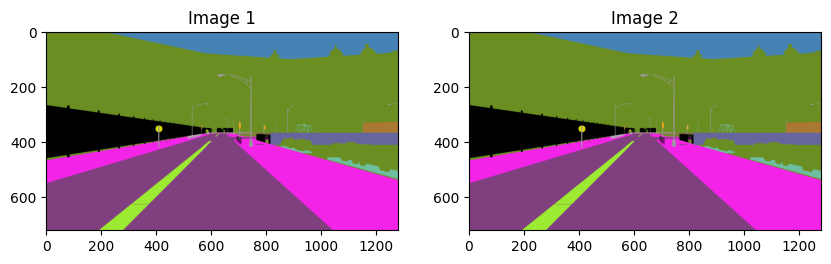

In [8]:
image_path = '/home/elahed/users/elahe/segmentation/segment/seg/image_2024-08-08-12-55_00002612.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
msk1 = color_to_label(image_rgb)
print(msk1.shape)
cv2.imwrite('img.png',msk1)
img = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)
output = label_to_color(msk1)
output2 = label_to_color(img)
cv2.imwrite('output2.png',output2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Image 1')
plt.imshow(output)

plt.subplot(1, 2, 2)
plt.title('Image 2')
plt.imshow(output2)


plt.show()
